In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mvarch

# Setup

Read the cleaned and combined data.

In [2]:
# Read the symptom trends and reported cases
df = pd.read_csv("../datasets/combined.csv")
df["date"] = pd.to_datetime(df["date"]).astype("datetime64[ns]")
df = df.set_index("date")
df

,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting,daily_new_positives,cumulative_positives,num_daily_tests,cumulative_tests,test_positivity_rate
date,,,,,,,,,,,,,,,,,,,
2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,1.66,2.12,0.65,1.40,2.85,15074,1005785,202446,25706759,0.0745
2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,1.66,1.90,0.69,1.43,2.40,11368,1017153,142345,25849104,0.0799
2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,1.66,1.84,0.70,1.40,2.37,11209,1028362,134360,25983464,0.0834
2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,1.48,1.85,0.77,1.42,2.27,12666,1041028,152402,26135866,0.0831
2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,1.51,1.81,0.74,1.40,2.14,16648,1057676,197816,26333682,0.0842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,4.00,2.26,0.80,4.22,3.26,40780,3251712,210996,87447878,0.1933
2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,4.37,2.27,0.82,4.36,3.19,67090,3318802,362594,87810472,0.1850
2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,4.48,2.29,0.83,4.36,3.15,74207,3393009,336469,88146941,0.2205


Define the list of symtoms of interest. We lowercased the names.

In [3]:
symptoms_list = [
    "fever",
    "chills",
    "cough",
    "shortness of breath",
    "sore throat",
    "headache",
    "fatigue",
    "muscle weakness",
    "anosmia",
    "sore throat",
    "ageusia",
    "nasal congestion",
    "nausea",
    "vomiting",
    "diarrhea",
]

# Applying Moving Average

We apply a moving average (MA) to the data to smooth out the noise. We use a window of 5 days following the literature [1] that analyze the time-dependent correlation between symptom trends and COVID-19 cases.

NOTE: The authors tried out different MA window sizes from 3 to 7 and found that 5 days provides the clearest results.

*[1] Halit Cinarka, Mehmet Atilla Uysal, Atilla Cifter, Elif Yelda Niksarlioglu, and Aslı Çarkoğlu. 2021. The relationship between Google search interest for pulmonary symptoms and COVID-19 cases using dynamic conditional correlation analysis. Sci Rep 11, 1 (July 2021), 14387. DOI:https://doi.org/10.1038/s41598-021-93836-y*

In [4]:
def apply_moving_avg(df, window=5):
    """Apply a moving average to the dataframe"""
    for col in df.columns:
        mv_col_name = "{}_mv({})".format(col, window)
        df[mv_col_name] = df[col].rolling(window=window).mean()
    return df

In [5]:
df = apply_moving_avg(df, window=5)
df

,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,symptom:nasal congestion,...,symptom:nasal congestion_mv(5),symptom:nausea_mv(5),symptom:shortness of breath_mv(5),symptom:sore throat_mv(5),symptom:vomiting_mv(5),daily_new_positives_mv(5),cumulative_positives_mv(5),num_daily_tests_mv(5),cumulative_tests_mv(5),test_positivity_rate_mv(5)
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,1.51,...,1.594,1.904,0.710,1.410,2.406,13393.0,1030000.8,165873.8,26001775.0,0.08102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,4.00,...,3.572,2.090,0.698,3.778,2.960,39622.0,3178522.6,278844.6,86996136.6,0.14868
2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,4.37,...,3.764,2.160,0.728,3.928,3.062,44153.8,3222676.4,279525.2,87275661.8,0.16094
2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,4.48,...,3.980,2.228,0.766,4.080,3.148,49053.6,3271730.0,266813.0,87542474.8,0.18018


# Applying Rolling Window Correlation

The literature uses two types of correlations:
1. Rolling Window Correlation (w/o MA) with a window of 31 days
2. Rolling Window Correlation (w/ MA of window size 5) with a window of 31 days
3. Dynamic Conditional Correlation

For Rolling Window Correlation, it is essentially Pearson correlation applied on a pre-defined size of rollowing window.

In [6]:
def apply_rolling_corr(df, symtoms_list, rolling_corr_window=31, mv_window=5):
    """For each symptom, apply rolling correlation on
    1. RSV vs reported cases
    2. Moving Average RSV vs reported cases (window size = window)
    """
    for symptom in symptoms_list:
        # Rolling Correlation
        source_symptom_col = "symptom:{}".format(symptom)
        source_case_col = "daily_new_positives"
        rolling_corr_col = "rolling_corr({}):{}".format(rolling_corr_window, symptom)
        df[rolling_corr_col] = (
            df[source_symptom_col]
            .rolling(rolling_corr_window)
            .corr(df[source_case_col])
        )
        # Rolling Correlation on Moving Average
        source_symptom_col = "symptom:{}_mv({})".format(symptom, mv_window)
        source_case_col = "daily_new_positives_mv({})".format(mv_window)
        mv_rolling_corr_col = "mv({})_rolling_corr({}):{}".format(
            mv_window, rolling_corr_window, symptom
        )
        df[mv_rolling_corr_col] = (
            df[source_symptom_col]
            .rolling(rolling_corr_window)
            .corr(df[source_case_col])
        )
    return df

In [7]:
df = apply_rolling_corr(df, symptoms_list)
df

,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,symptom:nasal congestion,...,rolling_corr(31):ageusia,mv(5)_rolling_corr(31):ageusia,rolling_corr(31):nasal congestion,mv(5)_rolling_corr(31):nasal congestion,rolling_corr(31):nausea,mv(5)_rolling_corr(31):nausea,rolling_corr(31):vomiting,mv(5)_rolling_corr(31):vomiting,rolling_corr(31):diarrhea,mv(5)_rolling_corr(31):diarrhea
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,1.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,4.00,...,0.832405,0.966535,0.861005,0.947128,0.576774,0.874415,0.528471,0.855150,0.778115,0.930539
2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,4.37,...,0.858008,0.968730,0.901778,0.954549,0.685160,0.896097,0.633211,0.886969,0.800593,0.947057
2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,4.48,...,0.881793,0.973552,0.929083,0.964362,0.758463,0.907884,0.691764,0.903909,0.807152,0.960478


We plot out the rolling window correlation to observe the ups and downs of the correlation over time.

In [8]:
def plot_rolling_corr(df, symptoms_list, rolling_corr_window=31, mv_window=5):
    # Plot Rolling Correlation
    for symptom in symptoms_list:
        rolling_corr_col = "rolling_corr({}):{}".format(rolling_corr_window, symptom)
        plt.plot(df.index, df[rolling_corr_col].astype(float), label=symptom)
    plt.xlabel("Date")
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
    plt.xticks(rotation=45)
    plt.ylabel("Rolling Window Correlation")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title("Rolling Window Correlation between Symptoms and New Positives")
    # plt.savefig(
    #     "./plots/ny_2021_rolling_corr({}).png".format(rolling_corr_window),
    #     bbox_inches="tight",
    # )
    plt.show()

    # Plot Rolling Correlation on Moving Average
    for symptom in symptoms_list:
        rolling_corr_col = "mv({})_rolling_corr({}):{}".format(
            mv_window, rolling_corr_window, symptom
        )
        plt.plot(df.index, df[rolling_corr_col].astype(float), label=symptom)
    plt.xlabel("Date")
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
    plt.xticks(rotation=45)
    plt.ylabel("Rolling Window Correlation")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(
        "Rolling Window Correlation between Symptoms and New Positives (MV = {})".format(
            mv_window
        )
    )
    # plt.savefig(
    #     "../plots/ny_2021_mv({})_rolling_corr({}).png".format(
    #         mv_window, rolling_corr_window
    #     ),
    #     bbox_inches="tight",
    # )
    plt.show()

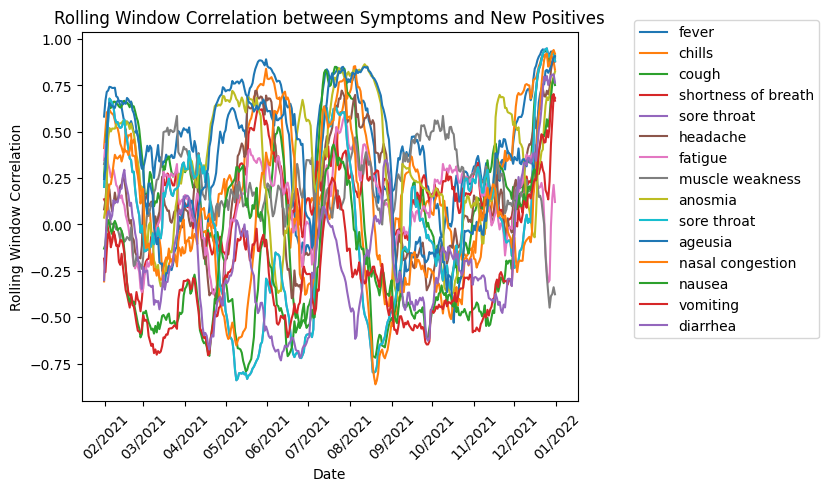

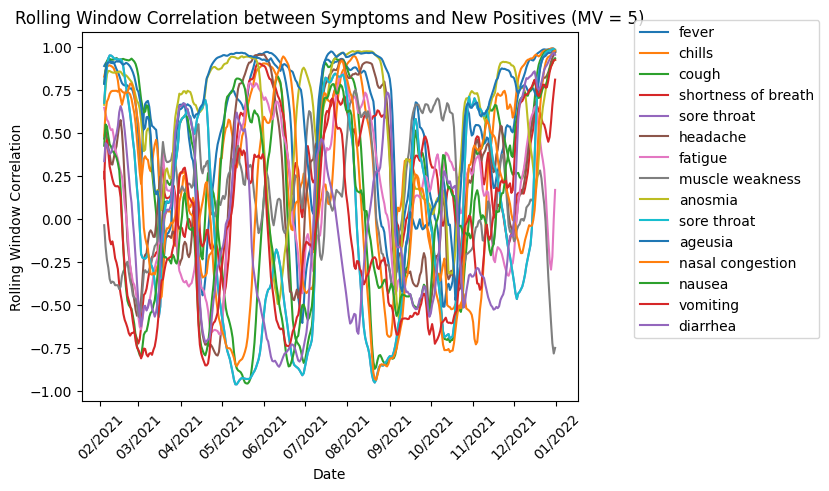

In [9]:
plot_rolling_corr(df, symptoms_list)

For clarity, we also plot of the rolling window correlation for each symptom trend separately.

In [10]:
def plot_individual_rolling_corr(
    df, symptoms_list, rolling_corr_window=31, mv_window=5
):
    for symptom in symptoms_list:
        rolling_corr_col = "rolling_corr({}):{}".format(rolling_corr_window, symptom)
        plt.plot(df.index, df[rolling_corr_col].astype(float), label=symptom)
        rolling_corr_col = "mv({})_rolling_corr({}):{}".format(
            mv_window, rolling_corr_window, symptom
        )
        plt.plot(
            df.index,
            df[rolling_corr_col].astype(float),
            label="{} (mv = {})".format(symptom, mv_window),
        )

        plt.xlabel("Date")
        ax = plt.gca()
        ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
        plt.xticks(rotation=45)
        plt.ylabel("Rolling Window Correlation")
        plt.legend()
        plt.title(
            "Rolling Window Correlation between {} and New Positives".format(
                symptom.title()
            )
        )
        # plt.savefig(
        #     "../plots/time_varying_correlation/ny_2021_{}_rolling_corr({}).png".format(
        #         symptom, rolling_corr_window
        #     ),
        #     bbox_inches="tight",
        # )
        plt.show()

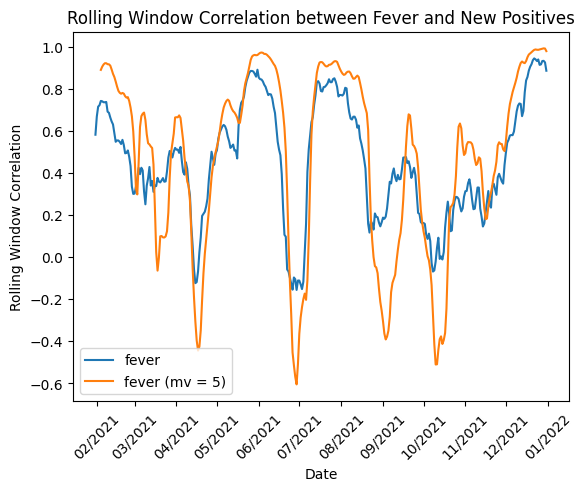

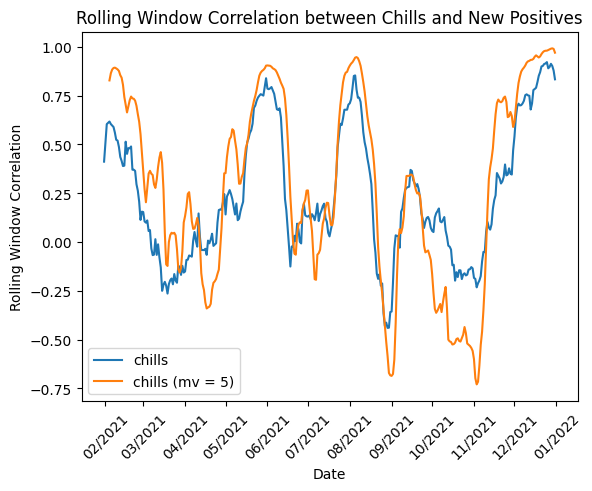

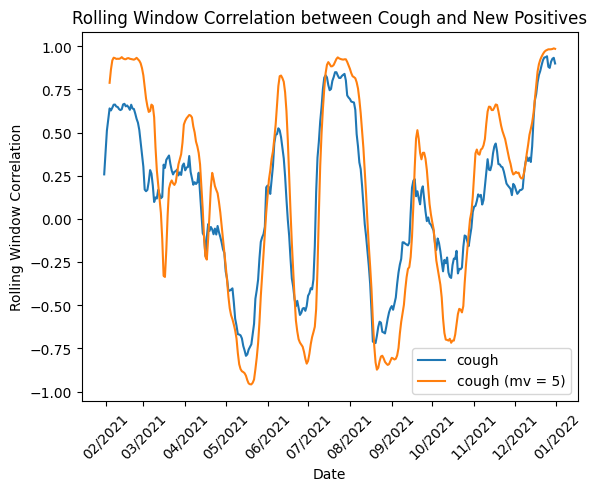

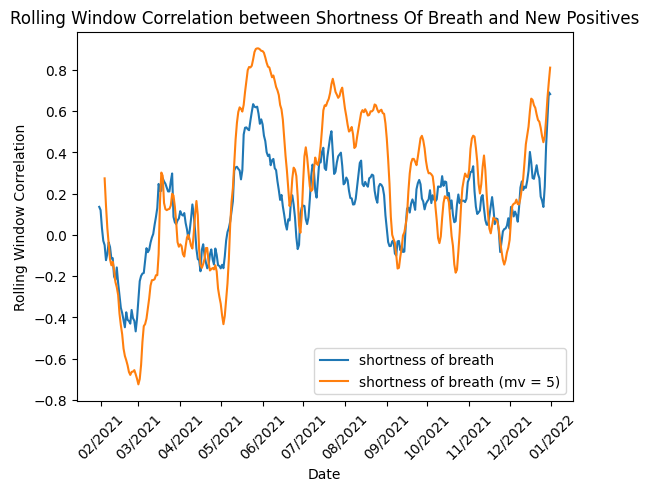

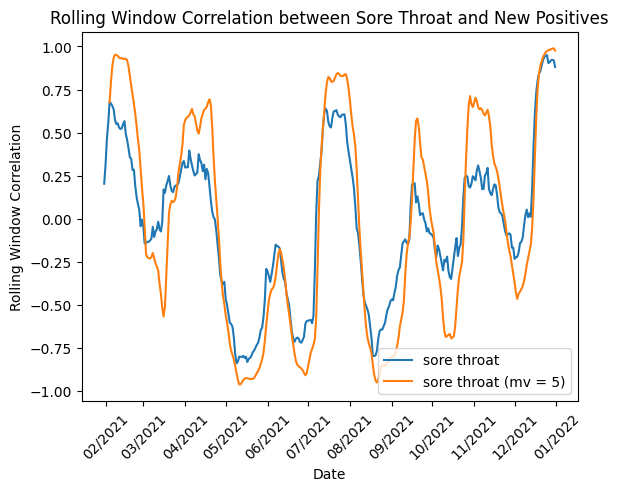

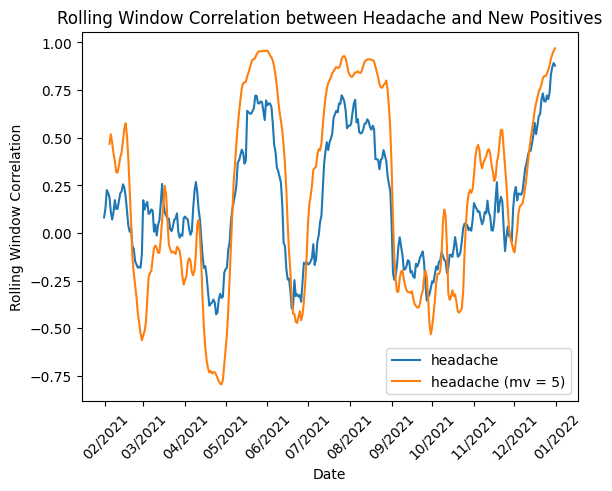

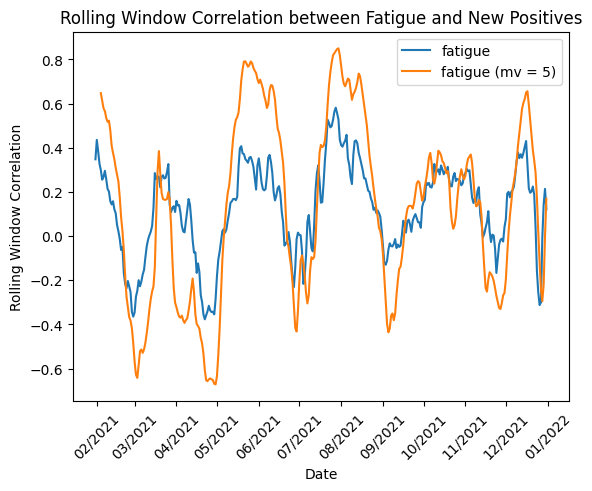

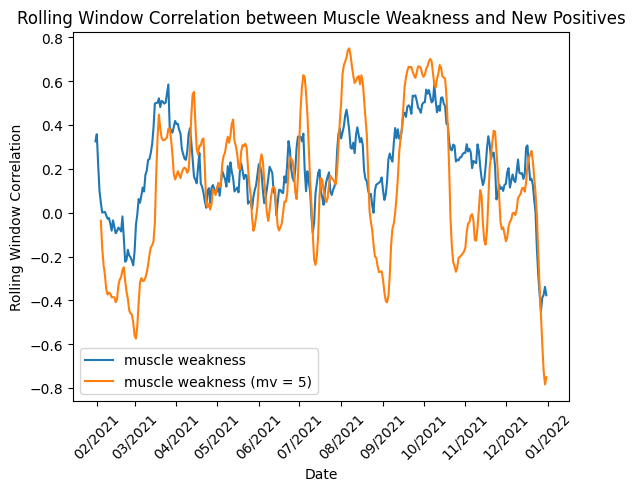

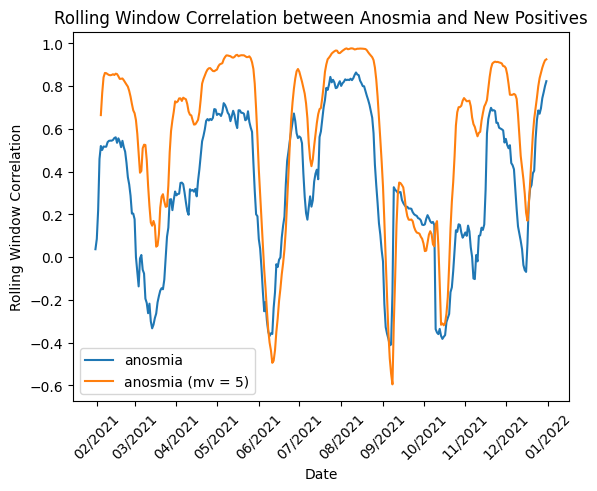

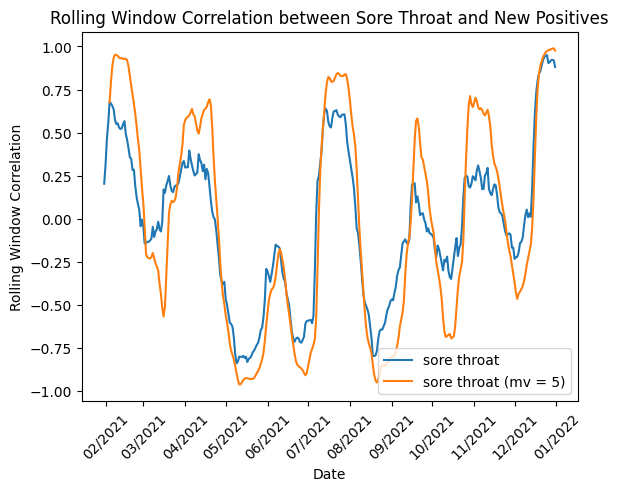

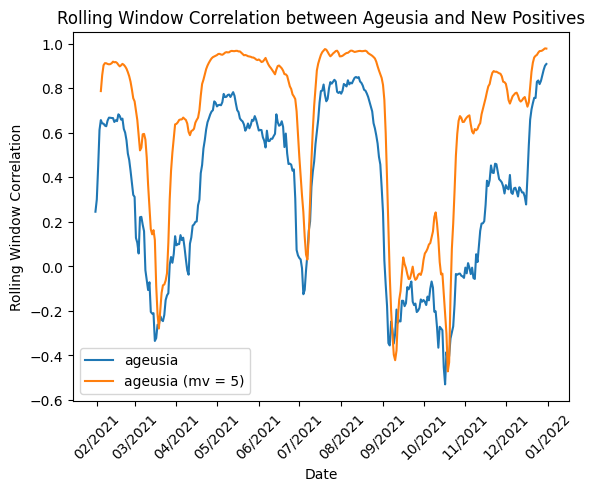

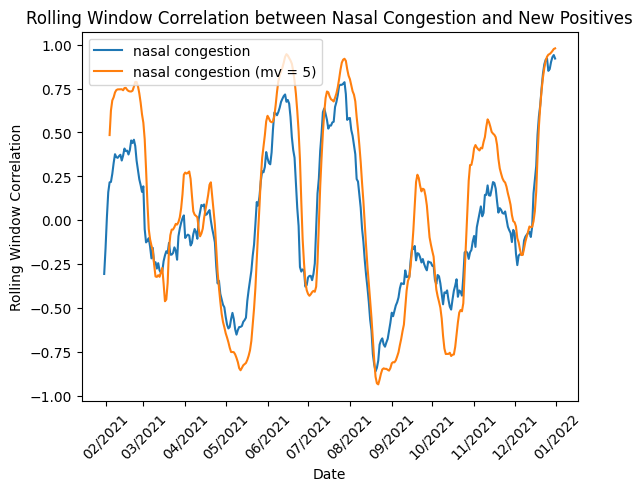

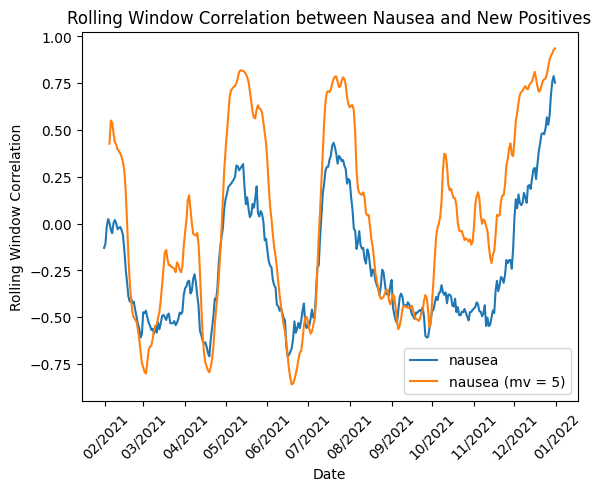

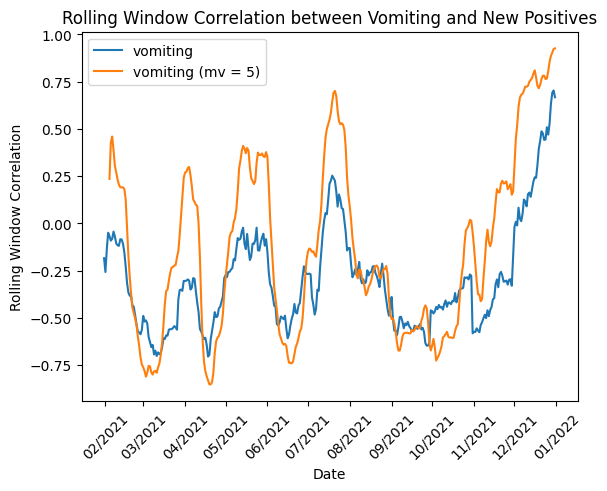

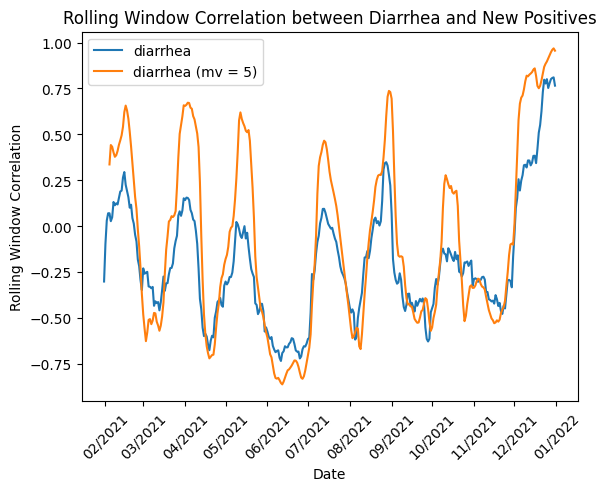

In [11]:
plot_individual_rolling_corr(df, symptoms_list)

To understand the changes in the rolling window correlation, we also plot the symptom trends and case counts on the same graph.

In [12]:
def plot_individual_symptom_and_cases(
    df, symptoms_list, mv_window=5, use_moving_average=True
):
    for symptom in symptoms_list:
        fig, ax = plt.subplots()
        if not use_moving_average:
            symptom_col = "symptom:{}".format(symptom)
            ax.plot(
                df.index, df[symptom_col].astype(float), color="tab:blue", label=symptom
            )
        else:
            symptom_mv_col = "symptom:{}_mv({})".format(symptom, mv_window)
            ax.plot(
                df.index,
                df[symptom_mv_col].astype(float),
                color="tab:blue",
                label="{} (mv = {})".format(symptom, mv_window),
            )
        ax.set_xlabel("Date")
        ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.set_ylabel("Relative Search Volume")

        ax2 = ax.twinx()
        if not use_moving_average:
            case_col = "daily_new_positives"
            ax2.plot(
                df.index,
                df[case_col].astype(float),
                color="tab:red",
                label="daily_new_positives",
            )
        else:
            case_mv_col = "daily_new_positives_mv({})".format(mv_window)
            ax2.plot(
                df.index,
                df[case_mv_col].astype(float),
                color="tab:red",
                label="daily_new_positives (mv = {})".format(mv_window),
            )
        ax2.set_ylabel("Daily New Positives")

        # Plot legend
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax2.legend(h1 + h2, l1 + l2)

        if not use_moving_average:
            title = "{} Search Trend vs Reported Cases".format(symptom.title())
            save_path = "../plots/time_varying_correlation/individual_symptom_vs_cases/ny_2021_{}_vs_cases.png".format(
                symptom
            )
        else:
            title = "{} Search Trend vs Reported Cases (MV = {})".format(
                symptom.title(), mv_window
            )
            save_path = "../plots/time_varying_correlation/individual_symptom_vs_cases/ny_2021_{}_vs_cases_mv({}).png".format(
                symptom, mv_window
            )
        plt.title(title)
        # plt.savefig(
        #     save_path,
        #     bbox_inches="tight",
        # )
        plt.show()

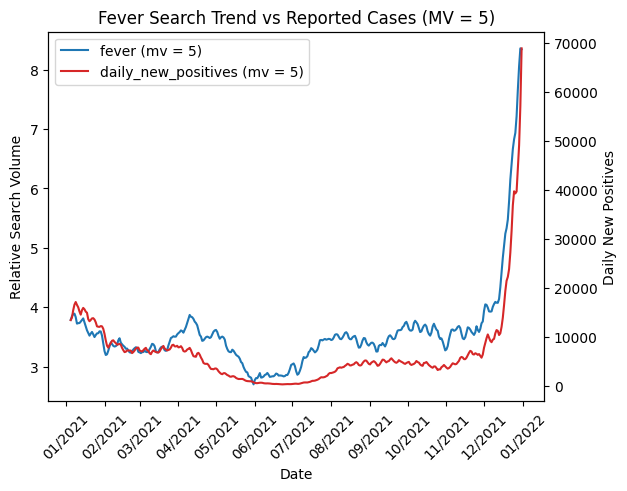

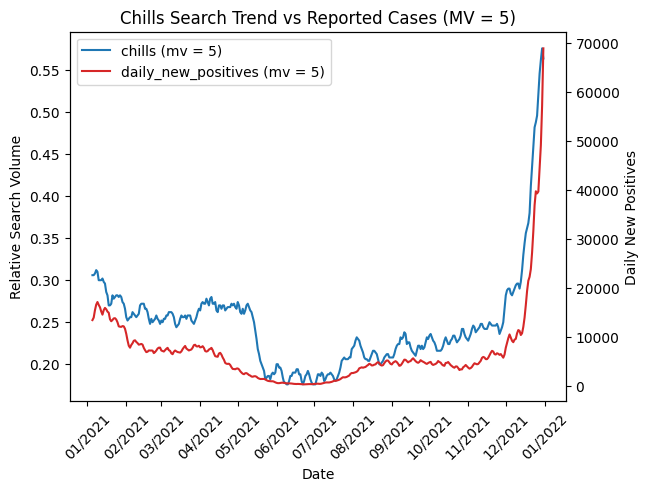

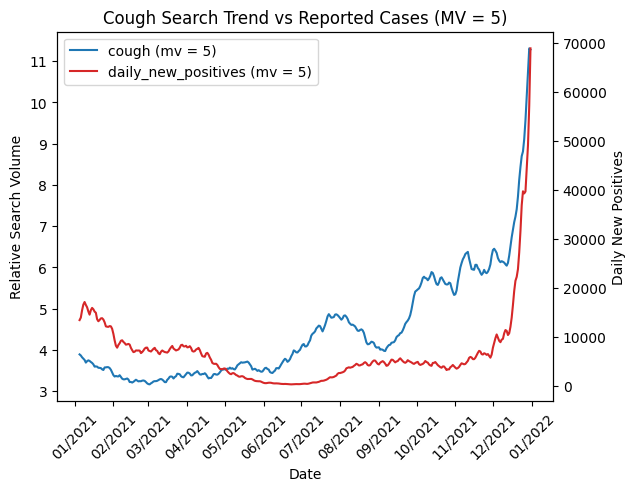

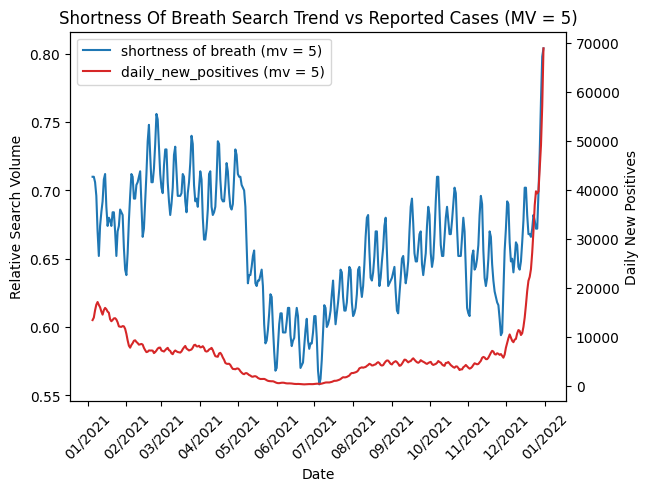

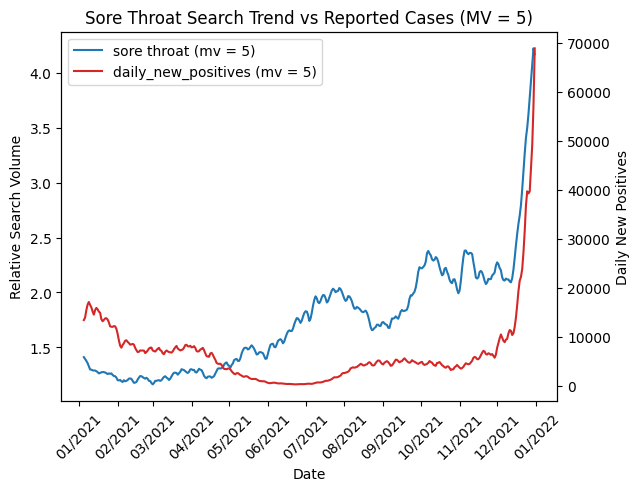

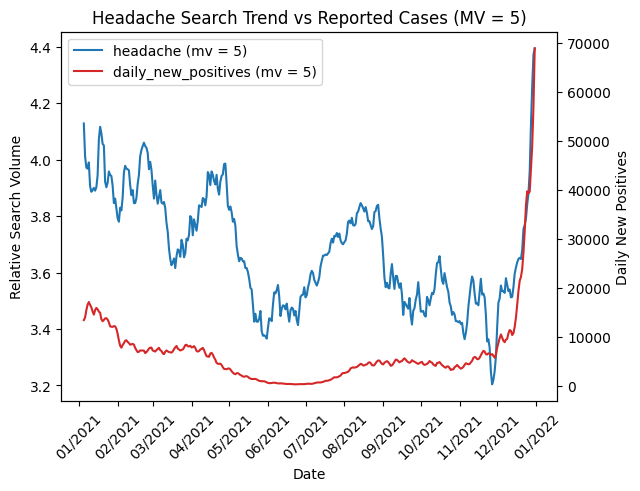

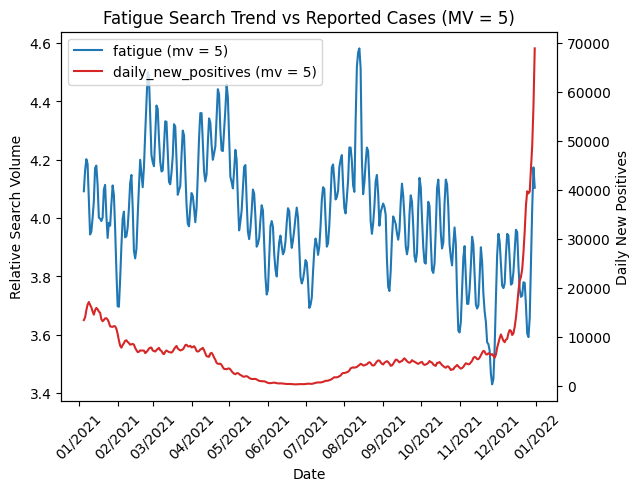

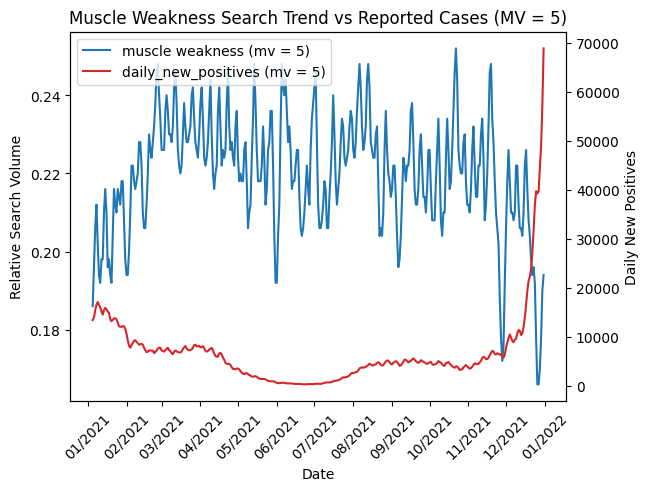

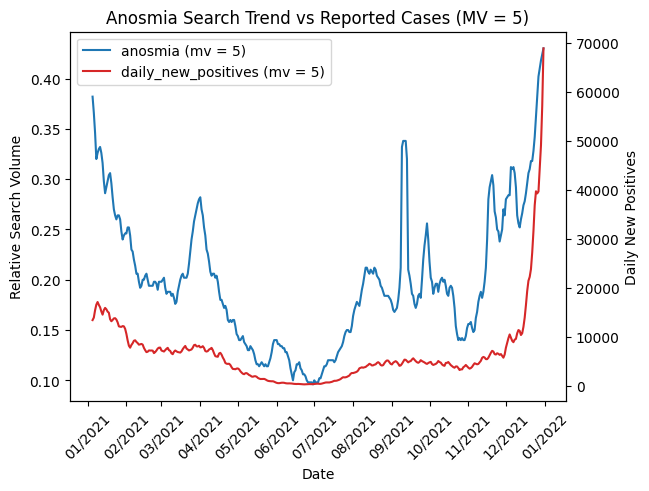

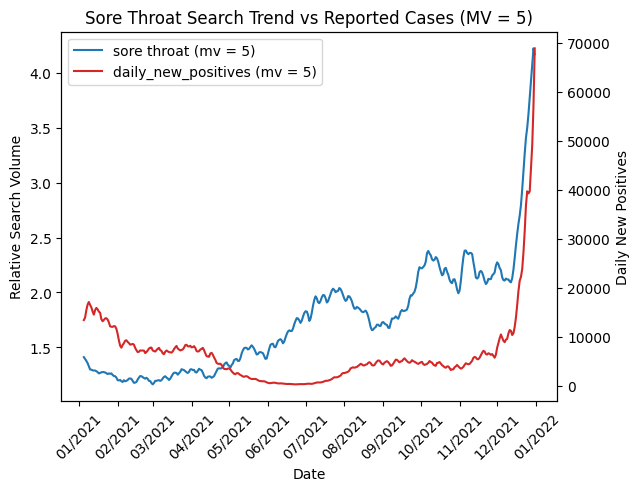

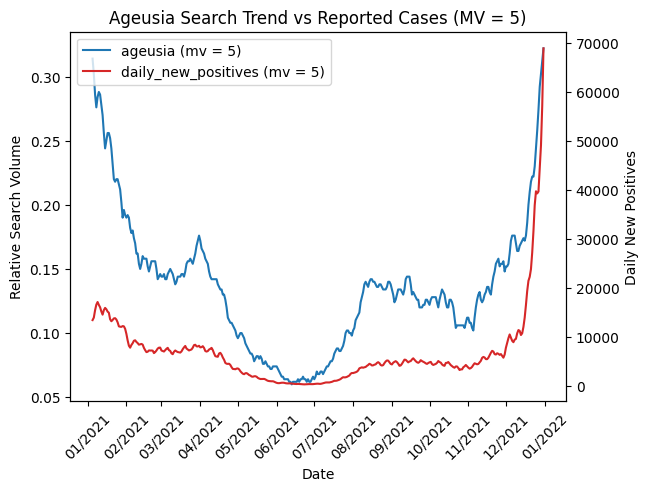

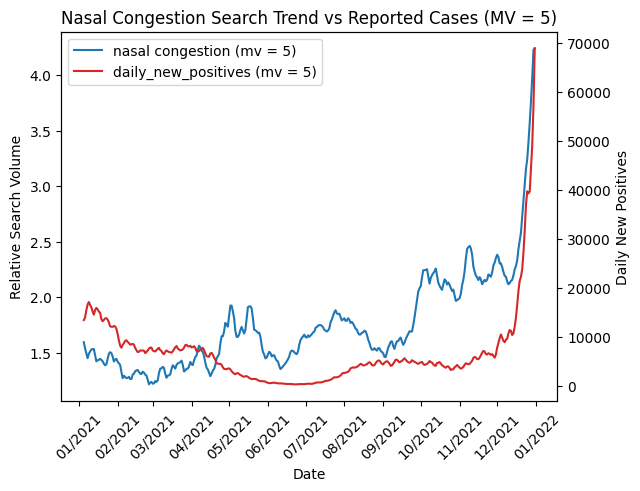

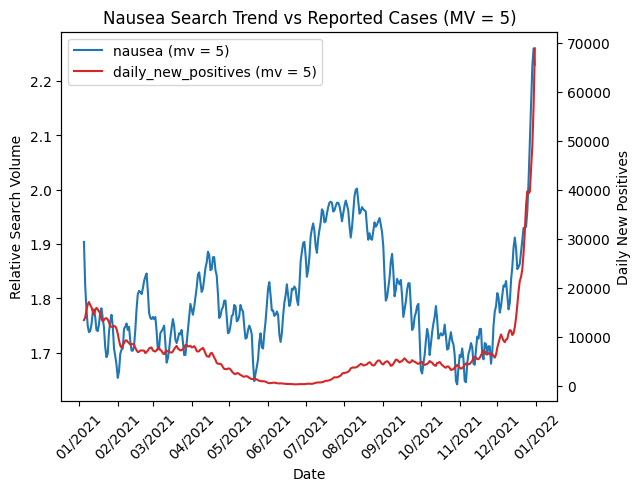

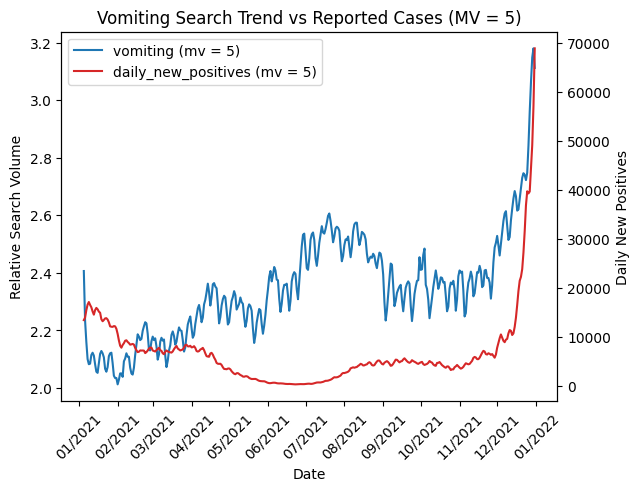

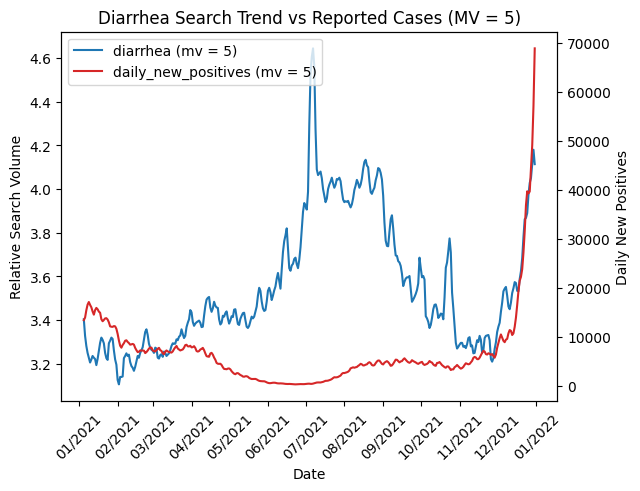

In [13]:
plot_individual_symptom_and_cases(df, symptoms_list, use_moving_average=True)

# Applying Dynamic Conditional Correlation (Not Working Yet)

Dynamic Conditional Correlation (DCC) is a time-varying correlation model that can capture the changes in the correlation over time. It is a generalization of the rolling window correlation.

In [14]:
def apply_dcc(df, symtoms_list):
    """For each symptom, apply the DCC model to the data and return the results in a new column."""
    for symptom in symptoms_list:
        # Dynamic Conditional Correlation
        source_symptom_col = "symptom:{}".format(symptom)
        source_case_col = "daily_new_positives"
        dcc_corr_col = "dcc_corr:{}".format(symptom)
        train_df = df[[source_symptom_col, source_case_col]].values
        model = mvarch.model_factory(
            distribution="studentt", mean="zero", univariate="arch", constraint="none"
        )
        model.fit(train_df)
        (
            mv_scale_predicted,
            uv_scale_predicted,
            mean_predicted,
            mv_scale_history,
            uv_scale_history,
            mean_history,
        ) = model.predict(train_df)
        corr = []
        for mv_scale_day in mv_scale_history.numpy():
            corr.append((mv_scale_day @ mv_scale_day.T)[0][1])
        df[dcc_corr_col] = corr
    return df

In [15]:
df = apply_dcc(df, symptoms_list)
df

,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,symptom:nasal congestion,...,dcc_corr:sore throat,dcc_corr:headache,dcc_corr:fatigue,dcc_corr:muscle weakness,dcc_corr:anosmia,dcc_corr:ageusia,dcc_corr:nasal congestion,dcc_corr:nausea,dcc_corr:vomiting,dcc_corr:diarrhea
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,1.66,...,0.992711,0.967916,0.995586,-0.385920,0.941508,0.979216,0.908651,0.860968,0.741043,0.778936
2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,1.66,...,0.991101,0.970258,0.966720,0.981509,0.981008,0.942860,0.926251,0.918715,0.902271,0.893923
2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,1.66,...,0.979807,0.983036,0.960208,0.955663,0.983617,0.941403,0.943199,0.955899,0.925720,0.927666
2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,1.48,...,0.982098,0.980705,0.969724,0.958881,0.966061,0.954455,0.959816,0.975886,0.939987,0.954894
2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,1.51,...,0.985523,0.981549,0.981173,0.973491,0.981489,0.968764,0.973472,0.985503,0.958196,0.973343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,4.00,...,0.951571,0.960261,0.959040,0.960274,0.955636,0.976584,0.958179,0.951351,0.943593,0.944840
2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,4.37,...,0.975910,0.978855,0.979370,0.982929,0.971784,0.986257,0.977565,0.973399,0.967255,0.974795
2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,4.48,...,0.980531,0.976690,0.985071,0.990025,0.977724,0.990614,0.989088,0.985964,0.983406,0.983221
